In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir("../input"))

['test', 'train', 'train.csv', 'sample_submission.csv']


In [2]:
base_dir="../input/"
train_dir=os.path.join(base_dir,"train/train")
test_dir=os.path.join(base_dir,"test/test")
print("Training images : \n{}".format(os.listdir(train_dir)[:10]), end='\n\n')
print("Testing images : \n{}".format(os.listdir(test_dir)[:10]))
testing_dir=os.path.join(base_dir,"test")
                      

Training images : 
['711c8a3efdfd2d7fa004b880970b8b6d.jpg', 'da197af684a4210c8173133a401a8b41.jpg', 'bcba2dfd2645c77e5803c7f028466abe.jpg', '1b29452f094c9e23f204b4dce356adcb.jpg', '4a627bf44c88f8bfd1f509b31fde0cc7.jpg', '15de1f86c0d0b569ce981ea9e6c82b99.jpg', 'f204268d009670aca50e65e4aed82462.jpg', 'fe329535336125c4d52b195f1a85fdd0.jpg', '33ff0f6eec09dc7fcc7622eb63413865.jpg', 'b24c1271f120ca2ab98b81fbdc602274.jpg']

Testing images : 
['6a571b6df250e9575fb82f8904c325a1.jpg', '2edb0bf826248b088d57e22799464c41.jpg', 'ea9422f63363a362ba6f482617006e76.jpg', '1021509e308bf12f71a01cac2ddca97f.jpg', '5eacbb413e5cd4e73cb7b1936758abf1.jpg', '861dccb4950b74108760daae0a1e016b.jpg', '6472fab8708bcd522836a9f1c6e9aae6.jpg', '3a77f9113b60c62b7d30c5f41828ab6b.jpg', '305d9cefe442e30abae64d84ecc8340e.jpg', '71957d3a60ca371e441fb6ff5ee6379f.jpg']


In [3]:
train_dataframe = pd.read_csv("../input/train.csv")
train_dataframe["has_cactus"] = np.where(train_dataframe["has_cactus"] == 1, "yes", "no")
print(train_dataframe.head())

                                     id has_cactus
0  0004be2cfeaba1c0361d39e2b000257b.jpg        yes
1  000c8a36845c0208e833c79c1bffedd1.jpg        yes
2  000d1e9a533f62e55c289303b072733d.jpg        yes
3  0011485b40695e9138e92d0b3fb55128.jpg        yes
4  0014d7a11e90b62848904c1418fc8cf2.jpg        yes


In [4]:
import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras import applications

Using TensorFlow backend.


In [5]:
train_datagen = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.10,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_dataframe(
    dataframe = train_dataframe,
    directory = train_dir,
    x_col="id",
    y_col="has_cactus",
    target_size=(75,75),
    subset="training",
    batch_size=250,
    shuffle=True,
    class_mode="binary"
)

valid_generator = train_datagen.flow_from_dataframe(
    dataframe = train_dataframe,
    directory = train_dir,
    x_col="id",
    y_col="has_cactus",
    target_size=(75,75),
    subset="validation",
    batch_size=125,
    shuffle=True,
    class_mode="binary"
)

Found 15750 images belonging to 2 classes.
Found 1750 images belonging to 2 classes.


In [6]:
test_datagen = ImageDataGenerator(
    rescale=1/255
)

test_generator = test_datagen.flow_from_directory(
    testing_dir,
    target_size=(75,75),
    batch_size=1,
    shuffle=False,
    class_mode=None
)

Found 4000 images belonging to 1 classes.


In [7]:
prenet = applications.inception_v3.InceptionV3(
    include_top = False,
    weights = 'imagenet',
    input_shape = (75, 75, 3)
)
model = Sequential()
model.add(prenet)
model.add(GlobalAveragePooling2D())
model.add(Dense(units = 120, activation='relu'))
model.add(Dense(units = 84, activation = 'relu'))
model.add(Dense(units = 1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
87916544/87910968 [==============================] - 3s 0us/step


In [8]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit_generator(
    train_generator,
    epochs = 100,
    steps_per_epoch = 63,
    validation_data = valid_generator,
    validation_steps = 14
)


Instructions for updating:
Use tf.cast instead.
Epoch 1/100
63/63 [==============================] - 62s 991ms/step - loss: 0.2155 - acc: 0.9074 - val_loss: 0.0548 - val_acc: 0.9834
Epoch 2/100
63/63 [==============================] - 34s 533ms/step - loss: 0.0441 - acc: 0.9853 - val_loss: 0.0422 - val_acc: 0.9840
Epoch 3/100
63/63 [==============================] - 35s 557ms/step - loss: 0.0254 - acc: 0.9919 - val_loss: 0.0216 - val_acc: 0.9914
Epoch 4/100
63/63 [==============================] - 35s 563ms/step - loss: 0.0198 - acc: 0.9933 - val_loss: 0.0282 - val_acc: 0.9909
Epoch 5/100
63/63 [==============================] - 35s 556ms/step - loss: 0.0162 - acc: 0.9939 - val_loss: 0.0228 - val_acc: 0.9966
Epoch 6/100
63/63 [==============================] - 35s 553ms/step - loss: 0.0159 - acc: 0.9952 - val_loss: 0.0143 - val_acc: 0.9954
Epoch 7/100
63/63 [==============================] - 35s 557ms/step - loss: 0.0126 - acc: 0.9961 - val_loss: 0.0148 - val_acc: 0.9937
Epoch 8/100
63

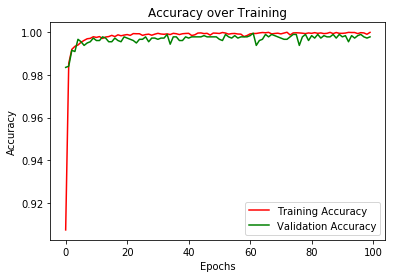

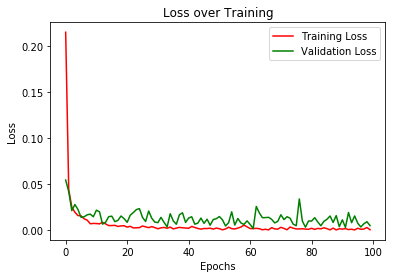

In [10]:
acc, loss = history.history['acc'], history.history['loss']
val_acc, val_loss = history.history['val_acc'], history.history['val_loss']

epochs = len(acc)

import matplotlib.pyplot as plt

plt.plot(range(epochs), acc, color='red', label='Training Accuracy')
plt.plot(range(epochs), val_acc, color='green', label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

plt.plot(range(epochs), loss, color='red', label='Training Loss')
plt.plot(range(epochs), val_loss, color='green', label='Validation Loss')
plt.legend()
plt.title('Loss over Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [11]:
preds = model.predict_generator(
    test_generator,
    steps=len(test_generator.filenames)
)

In [12]:
image_ids = [name.split('/')[-1] for name in test_generator.filenames]
preds = preds.flatten()
data = {'id': image_ids, 'has_cactus':preds} 
submission = pd.DataFrame(data)
print(submission.head())

                                     id    has_cactus
0  000940378805c44108d287872b2f04ce.jpg  9.999976e-01
1  0017242f54ececa4512b4d7937d1e21e.jpg  9.999908e-01
2  001ee6d8564003107853118ab87df407.jpg  2.258025e-16
3  002e175c3c1e060769475f52182583d0.jpg  5.433649e-09
4  0036e44a7e8f7218e9bc7bf8137e4943.jpg  9.999862e-01


In [13]:
submission.to_csv("submission.csv", index=False)